y_actual number =  4
y_pred =  [[1.7357334e-12 4.2977295e-11 2.3164661e-15 2.0144058e-14 9.9999690e-01
  6.8069418e-11 4.3336425e-15 7.7742428e-08 7.5174721e-11 3.0360118e-06]]
y_pred number =  [[1.7357334e-12 4.2977295e-11 2.3164661e-15 2.0144058e-14 9.9999690e-01
  6.8069418e-11 4.3336425e-15 7.7742428e-08 7.5174721e-11 3.0360118e-06]]
y_actual number =  3
y_pred =  [[7.1434389e-21 7.3839730e-13 4.4107096e-06 9.9999559e-01 2.1505398e-13
  2.4685143e-09 1.5028706e-18 3.1743694e-11 8.4013047e-11 4.7767157e-10]]
y_pred number =  [[7.1434389e-21 7.3839730e-13 4.4107096e-06 9.9999559e-01 2.1505398e-13
  2.4685143e-09 1.5028706e-18 3.1743694e-11 8.4013047e-11 4.7767157e-10]]
y_actual number =  8
y_pred =  [[6.9642117e-15 3.0746303e-14 2.6618825e-13 1.2088052e-15 3.6049418e-17
  9.8160236e-14 4.7009127e-29 1.5456726e-15 1.0000000e+00 2.6110491e-13]]
y_pred number =  [[6.9642117e-15 3.0746303e-14 2.6618825e-13 1.2088052e-15 3.6049418e-17
  9.8160236e-14 4.7009127e-29 1.5456726e-15 1.0000000e

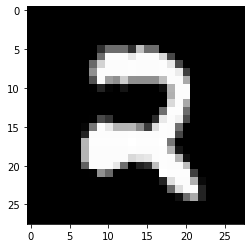

In [11]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dense, Flatten
from keras.utils import to_categorical
from keras.datasets import mnist


def plot_loss_curve(history):
    plt.figure(figsize = (5,3))
    
    plt.plot(history['loss'])
    plt.plot(history['val_loss'])
    
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['train','test'], loc = 'upper right')
    plt.show
    
def train_mnist_model():
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape(60000,28,28,1) 
    X_test = X_test.reshape(10000,28,28,1)
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
#     print(y_train[1563])
    
    
    model.compile(optimizer= 'adam', loss='categorical_crossentropy',metrics=['accuracy'])
    history = model.fit(X_train,y_train, validation_data=(X_test, y_test), batch_size=20, epochs = 3)
    
    plot_loss_curve(history.history)
    print(history.history)
    print('train loss =', history.history['loss'][-1])
    print('validation loss =', history.history['val_loss'][-1])

    model.save('mnist.model')
    return model

def predict_image_sample(model,X_test, y_test, test_id= -1 ):
    if test_id <0 :
        from random import randrange
        test_sample_id = randrange(10000)
    else:
        test_sample_id = test_id
    
    test_image =X_test[test_sample_id]
    plt.imshow(test_image, cmap = 'gray')
    
    test_image = test_image.reshape(1,28,28,1)
    
    y_actual = y_test[test_sample_id]
    print('y_actual number = ', y_actual)
    
    y_pred = model.predict(test_image)
    print("y_pred = ", y_pred)
    y_pred_num = np.argmax(y_pred, axis = 1)[0]
    print('y_pred number = ', y_pred)
    return y_actual , y_pred_num
    
    
if __name__ == '__main__' :
    all, n = 0,0
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    model = load_model('mnist.model')
#     predict_image_sample(model,X_test, y_test)
    
    for i in range(200):
        y_actual , y_pred_num = predict_image_sample(model,X_test, y_test)
        all += 1
        if y_actual == y_pred_num:
            n += 1 
        else : pass
print('정확도 = ', (n/all)*100,'\n',all,' '*10,n)